In [1]:
import tensorflow as tf

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("E:\\home\\workspace\\datasets\\mnist",reshape=False,one_hot=True)

Instructions for updating:
Use the retry module or similar alternatives.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\home\workspace\datasets\mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting E:\home\workspace\datasets\mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting E:\home\workspace\datasets\mnist\t10k-images-idx3-ubyte.gz
Extracting E:\home\workspace\datasets\mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [3]:
mnist.train.images.shape

(55000, 28, 28, 1)

In [4]:
x = tf.placeholder(tf.float32,(None,28,28,1))
y = tf.placeholder(tf.float32,(None,10))
# drop_prob = tf.placeholder(tf.float32)

In [5]:
outputs = tf.layers.conv2d(x,filters=32,kernel_size=3,padding='same',activation=tf.nn.relu)
# outputs = tf.layers.conv2d(outputs,filters=64,kernel_size=3,padding='same',activation=tf.nn.relu)
# outputs = tf.layers.max_pooling2d(outputs,2,2,padding='same')

# outputs = tf.layers.conv2d(outputs,filters=128,kernel_size=3,padding='same',activation=tf.nn.relu)
# outputs = tf.layers.conv2d(outputs,filters=128,kernel_size=3,padding='same',activation=tf.nn.relu)
# outputs = tf.layers.max_pooling2d(outputs,2,2,padding='same')

outputs = tf.layers.flatten(outputs)
outputs = tf.layers.dense(outputs,256,activation=tf.nn.relu)

logits = tf.layers.dense(outputs,10)

In [6]:
# logits = tf.layers.dense(tf.reshape(x,[-1,784]),10)

In [7]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=logits))

In [8]:
y_pred = tf.nn.softmax(logits)

In [9]:
accuray = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y_pred,axis=1),tf.argmax(y,axis=1)),tf.float32))

In [10]:
pred_index = tf.not_equal(tf.argmax(y_pred,axis=1),tf.argmax(y,axis=1))

In [11]:
pred_label = tf.argmax(y_pred,axis=1)

In [12]:
train_op = tf.train.AdamOptimizer().minimize(loss)

In [13]:
loss

<tf.Tensor 'Mean:0' shape=() dtype=float32>

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1001):
        xs,ys = mnist.train.next_batch(100)
        sess.run(train_op,{x:xs,y:ys})
        if i % 100 == 0:
            loss_value,accuray_value = sess.run([loss, accuray],{x:mnist.test.images,y:mnist.test.labels})
            print("Iters: %5d  ---> Test Loss:  %.3f, Test Accuracy: %.4f"%(i+1,loss_value,accuray_value))
            
            loss_value,accuray_value = sess.run([loss, accuray],{x:xs,y:ys})
            print("Iters: %5d  ---> Train Loss:  %.3f, Train Accuracy: %.4f"%(i+1,loss_value,accuray_value))
            
            print("-"*80)
            
            
    pred_index_value,pred_label_value,y_pred_value = sess.run([pred_index,pred_label,y_pred],{x:mnist.test.images,y:mnist.test.labels})
    
    

Iters:     1  ---> Test Loss:  2.029, Test Accuracy: 0.2496
Iters:     1  ---> Train Loss:  1.578, Train Accuracy: 0.4500
--------------------------------------------------------------------------------
Iters:   101  ---> Test Loss:  0.186, Test Accuracy: 0.9439
Iters:   101  ---> Train Loss:  0.190, Train Accuracy: 0.9400
--------------------------------------------------------------------------------
Iters:   201  ---> Test Loss:  0.118, Test Accuracy: 0.9644
Iters:   201  ---> Train Loss:  0.254, Train Accuracy: 0.9400
--------------------------------------------------------------------------------
Iters:   301  ---> Test Loss:  0.094, Test Accuracy: 0.9701
Iters:   301  ---> Train Loss:  0.093, Train Accuracy: 0.9900
--------------------------------------------------------------------------------
Iters:   401  ---> Test Loss:  0.072, Test Accuracy: 0.9755
Iters:   401  ---> Train Loss:  0.044, Train Accuracy: 0.9900
------------------------------------------------------------------

In [15]:
import numpy as np

In [16]:
threshold = 0.8

In [17]:
error_images = mnist.test.images[pred_index_value,:].reshape(-1,28,28)

error_labels = np.argmax(mnist.test.labels[pred_index_value,:],axis=1)
pred_error_labels = pred_label_value[pred_index_value]
prob_error_labels = np.max(y_pred_value[pred_index_value,:],axis=1)

In [18]:
prob_error_labels_threshold = prob_error_labels[prob_error_labels>threshold]
pred_error_labels_threshold = pred_error_labels[prob_error_labels>threshold]
error_labels_threshold = error_labels[prob_error_labels>threshold]
error_images_threshold = error_images[prob_error_labels>threshold,:,:]

In [19]:
prob_error_labels_threshold.shape

(72,)

In [20]:
prob_error_labels.shape

(182,)

In [21]:
% matplotlib inline
from matplotlib import pyplot as plt

In [22]:
high = prob_error_labels_threshold.shape[0]

  60th exmaple --->  True label is 3 and Predict label is 8 with probability 0.890


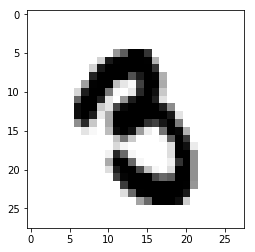

   1th exmaple --->  True label is 6 and Predict label is 0 with probability 0.910


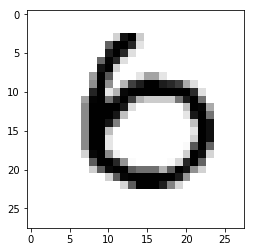

  66th exmaple --->  True label is 7 and Predict label is 2 with probability 0.961


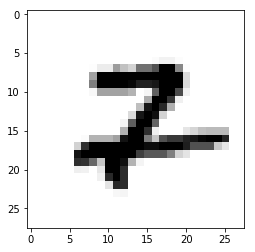

  25th exmaple --->  True label is 9 and Predict label is 3 with probability 0.886


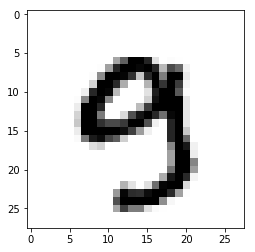

  15th exmaple --->  True label is 8 and Predict label is 0 with probability 0.872


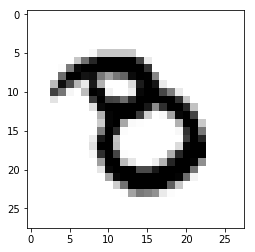

   2th exmaple --->  True label is 5 and Predict label is 3 with probability 0.883


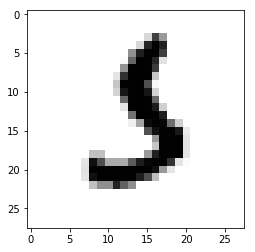

  41th exmaple --->  True label is 7 and Predict label is 8 with probability 0.928


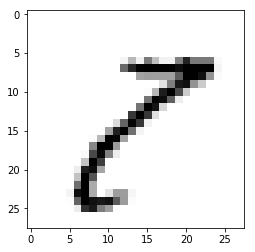

  27th exmaple --->  True label is 9 and Predict label is 4 with probability 0.844


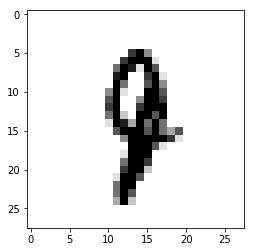

  20th exmaple --->  True label is 9 and Predict label is 4 with probability 0.829


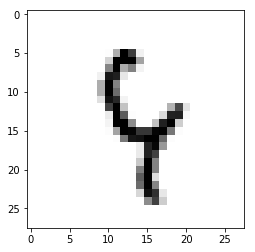

  29th exmaple --->  True label is 5 and Predict label is 3 with probability 0.919


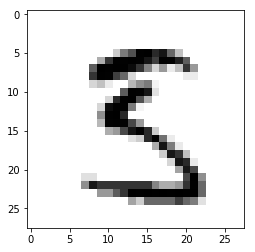

In [23]:
for _ in range(10):
    i = np.random.randint(low=0,high=high)
    plt.imshow(error_images_threshold[i],cmap='gray_r')
    print("%4dth exmaple --->  True label is %d and Predict label is %d with probability %.3f"%(i,error_labels_threshold[i],pred_error_labels_threshold[i],prob_error_labels_threshold[i]))
    plt.show()